<a href="https://colab.research.google.com/github/astockt2/PortfolioProjects/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

#Dataset

Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/1[link text](https://)0.24432/C52C8B.

In [15]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']#column labels
df=pd.read_csv('magic04.data',names=cols) #table with column names assign as dataframe df
df.head() #show the first five samples including column names.

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [16]:
df['class']= (df['class']=='g').astype(int) #converts  g to 1

In [17]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

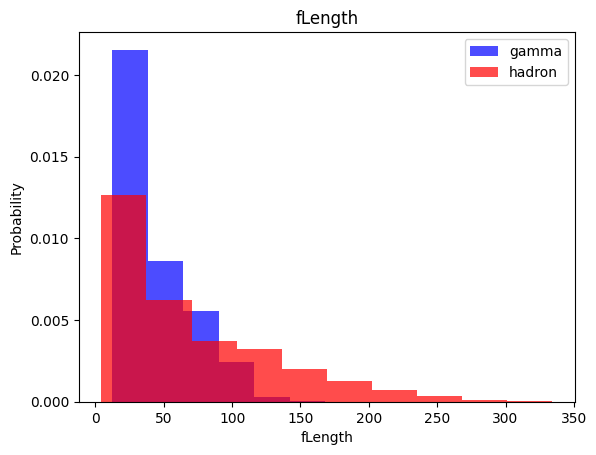

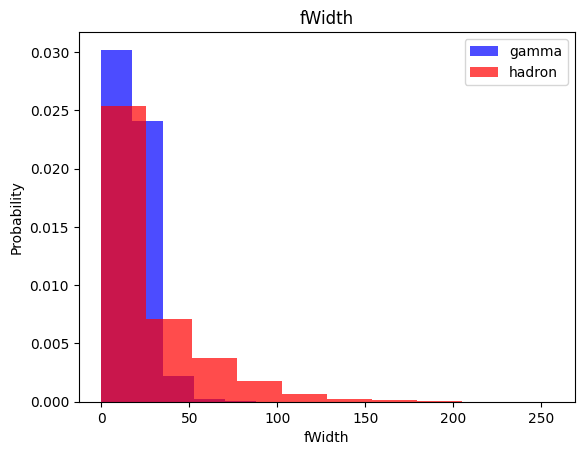

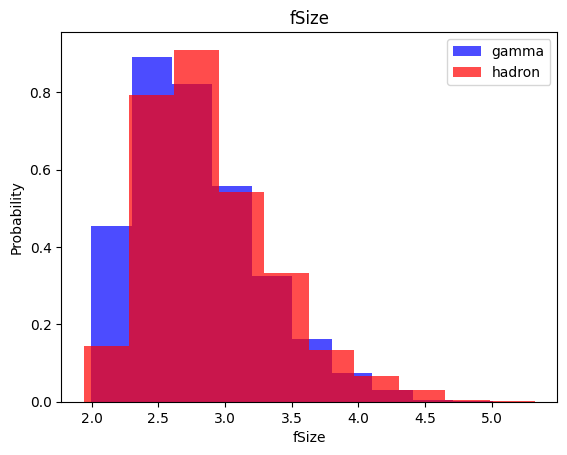

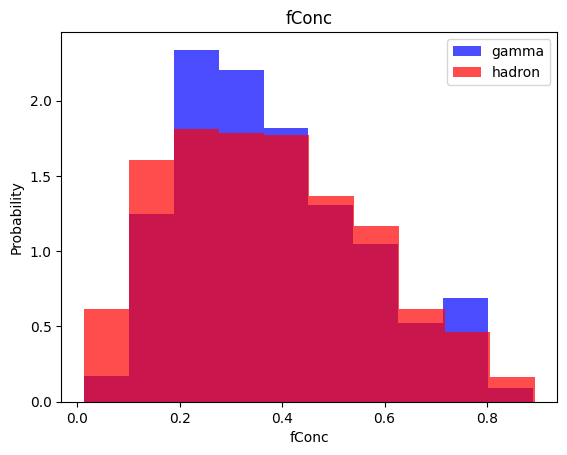

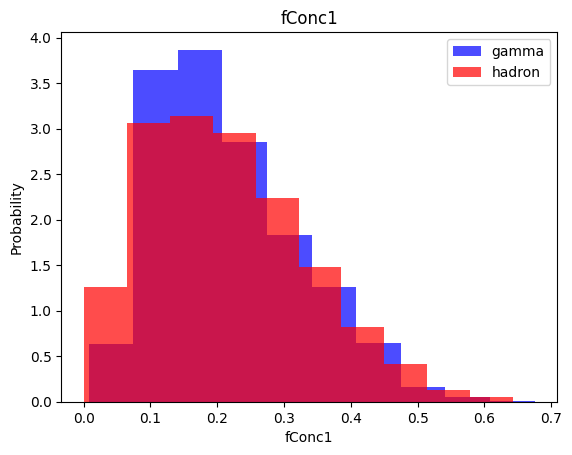

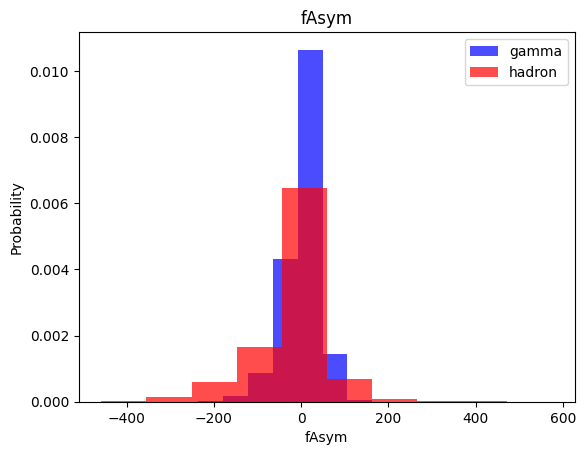

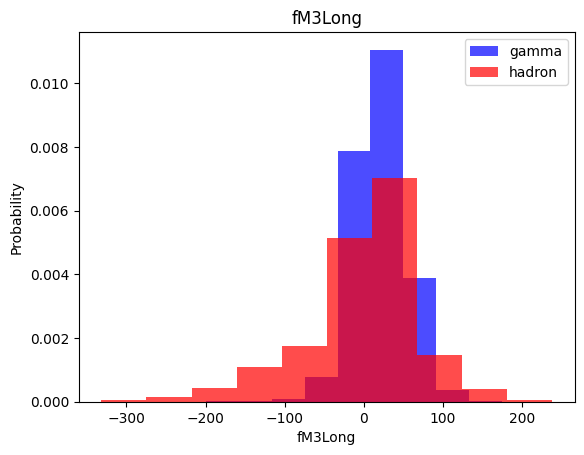

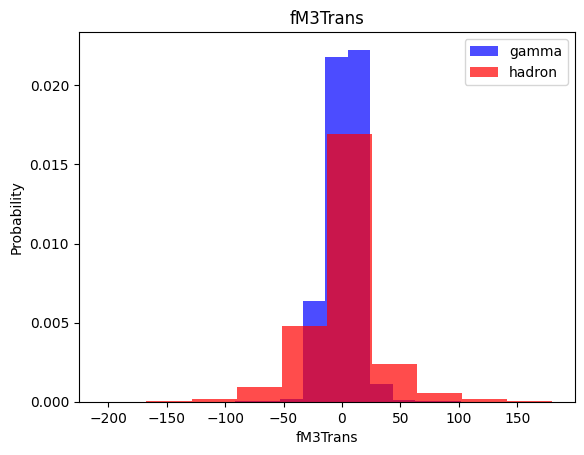

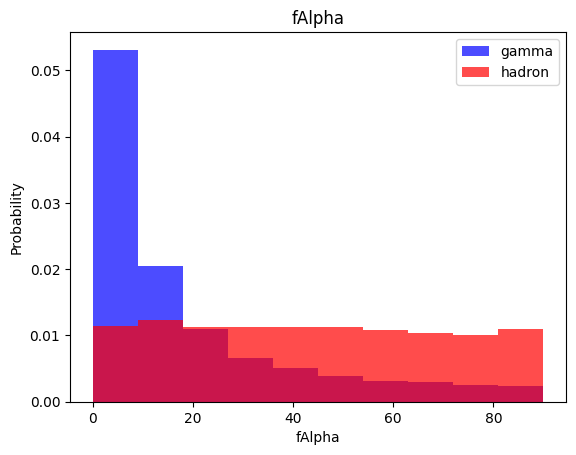

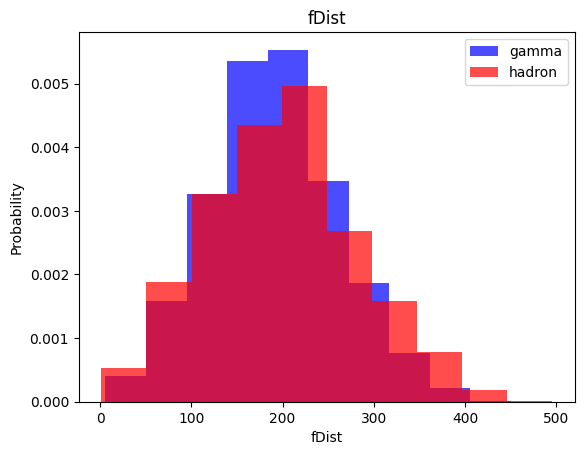

In [18]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label],color='blue',label='gamma',alpha=0.7,density=True)
  plt.hist(df[df["class"]==0][label],color='red',label='hadron',alpha=0.7,density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


<h2>Train, Validation, Test datasets</h2>

In [19]:
train,valid,test = np.split(df.sample(frac=1),[int(.6*len(df)),int(0.8*len(df))])

In [20]:
#make values relative to mean
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values #values up to the last column
  y = dataframe[dataframe.columns[-1]].values #values in the last column

  scaler  = StandardScaler()
  x = scaler.fit_transform(x) #fits and transforms x.

# want to increase the values of the hadrons to match number of gammas better
  if oversample:
    ros=RandomOverSampler()
    x, y, =ros.fit_resample(x,y)#take more of the less class and keep sampling to increase the dataset of the smaller set to match larger set

  data = np.hstack((x,np.reshape(y,(-1,1)))) #numpy array horizontally stacked. side-by-side not on top of each other
  #x is 2D and y is 1D. y is reshaped to a 2D array. len(y)=-1

  return data, x, y



In [21]:

#split dataset to training dataset, validation dataset, and test dataset
train, x_train, y_train = scale_dataset(train,oversample=True)
valid, x_valid, y_valid = scale_dataset(valid,oversample=False)
test, x_test, y_test = scale_dataset(test,oversample=False)

#kNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [24]:
y_pred = knn_model.predict(x_test)

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.72      0.73      1325
           1       0.85      0.87      0.86      2479

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



#Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
nb_model = GaussianNB()
nb_model.fit(x_train,y_train)

GaussianNB()

In [28]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48      1325
           1       0.73      0.89      0.80      2479

    accuracy                           0.71      3804
   macro avg       0.68      0.63      0.64      3804
weighted avg       0.70      0.71      0.69      3804



#Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression


In [30]:
lr_model = LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [31]:
y_pred = lr_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69      1325
           1       0.84      0.81      0.82      2479

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [32]:
from sklearn.svm import  SVC

In [33]:
svm_model = SVC()
svm_model = svm_model.fit(x_train,y_train)

In [34]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1325
           1       0.89      0.89      0.89      2479

    accuracy                           0.85      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Network

In [35]:
import tensorflow as tf

In [36]:
def plot_history(history): #plot loss over each training cycle
  fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  #plot accuracy over each epoch
  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('accuracy')
  ax2.grid(True)


  plt.show()



In [37]:
def train_model(x_train,y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),#prevent overfitting
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs = epochs,batch_size = batch_size ,validation_split=0.2, verbose=0
    )

  return nn_model, history

16 nodes, dropout 0,lr 0.01, batch_size 32


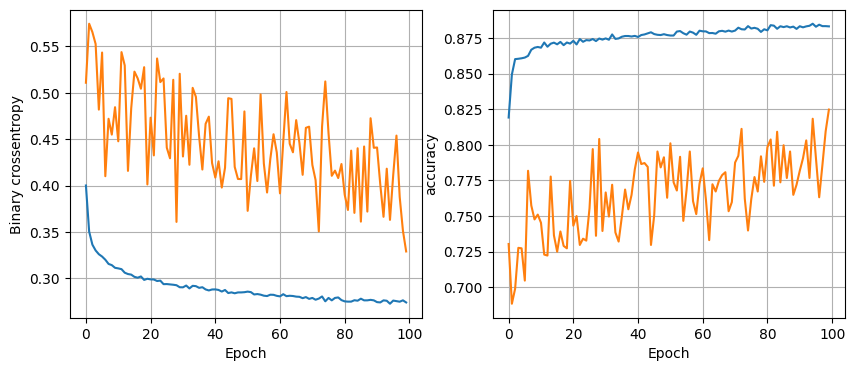

119/119 [==============================] - 0s 1ms/step - loss: 0.3435 - accuracy: 0.8628
16 nodes, dropout 0,lr 0.01, batch_size 64


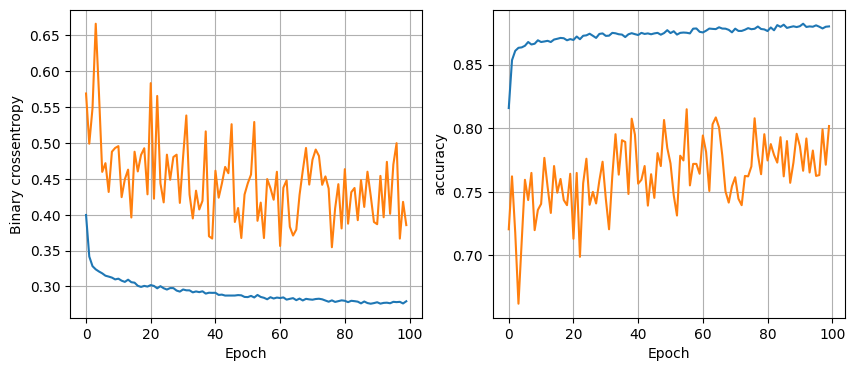

119/119 [==============================] - 0s 1ms/step - loss: 0.3283 - accuracy: 0.8672
16 nodes, dropout 0,lr 0.01, batch_size 128


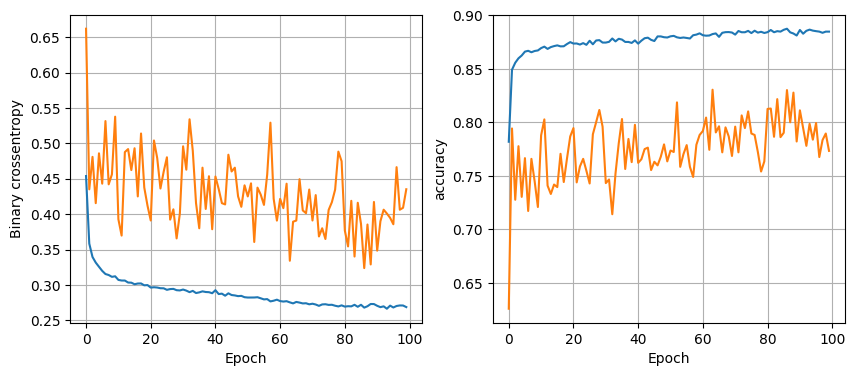

119/119 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.8699
16 nodes, dropout 0,lr 0.005, batch_size 32


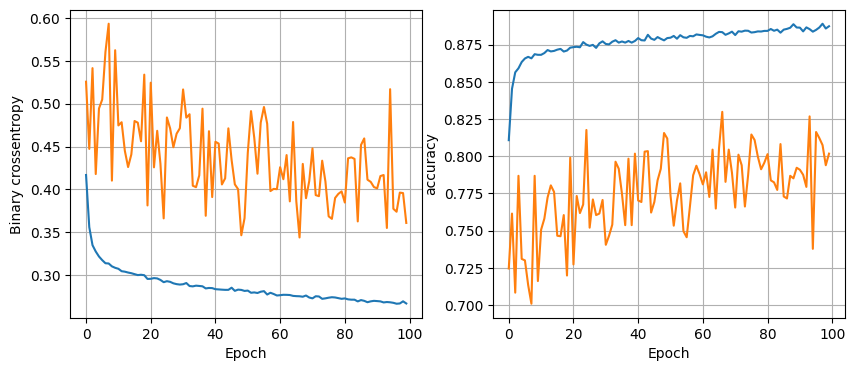

119/119 [==============================] - 0s 1ms/step - loss: 0.3282 - accuracy: 0.8641
16 nodes, dropout 0,lr 0.005, batch_size 64


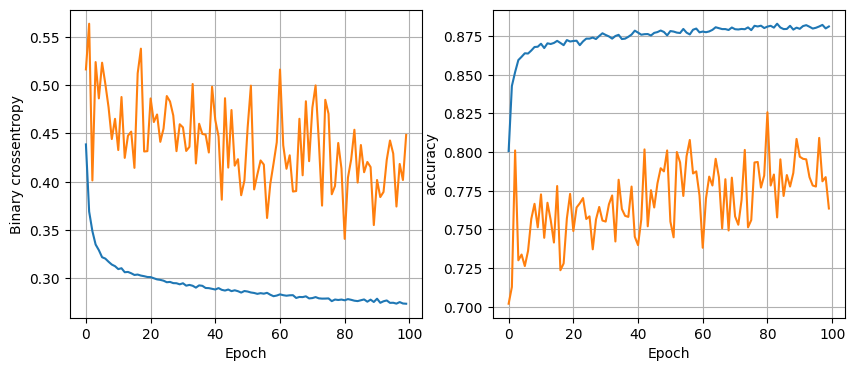

119/119 [==============================] - 0s 1ms/step - loss: 0.3172 - accuracy: 0.8709
16 nodes, dropout 0,lr 0.005, batch_size 128


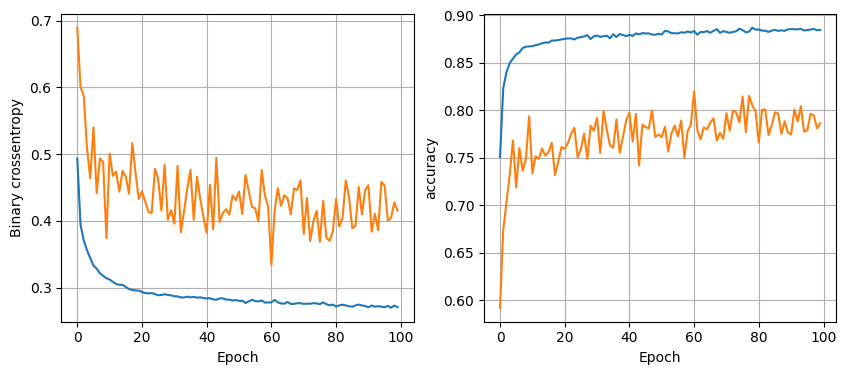

119/119 [==============================] - 0s 1ms/step - loss: 0.3144 - accuracy: 0.8757
16 nodes, dropout 0,lr 0.001, batch_size 32


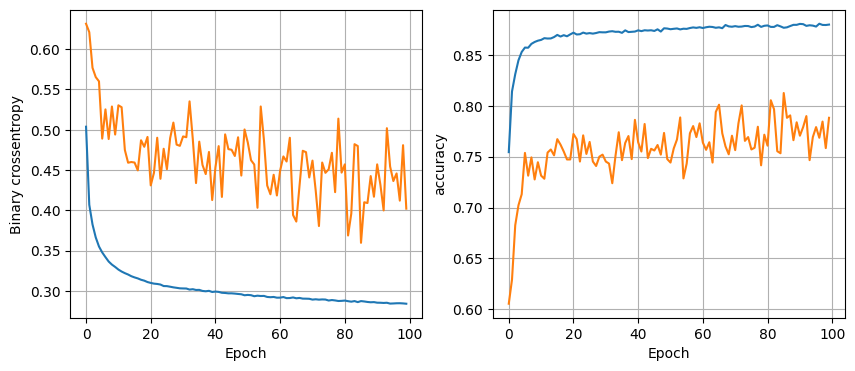

119/119 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.8715
16 nodes, dropout 0,lr 0.001, batch_size 64


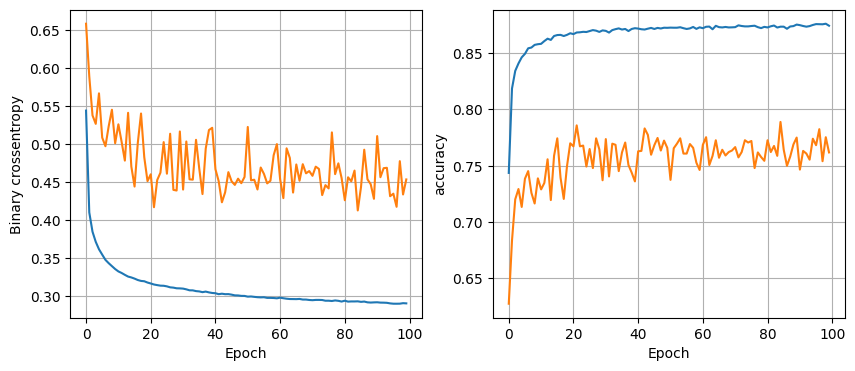

119/119 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8722
16 nodes, dropout 0,lr 0.001, batch_size 128


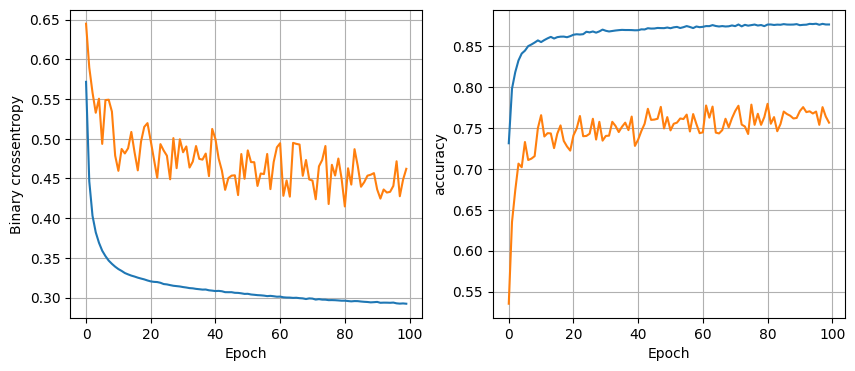

119/119 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8722
16 nodes, dropout 0.2,lr 0.01, batch_size 32


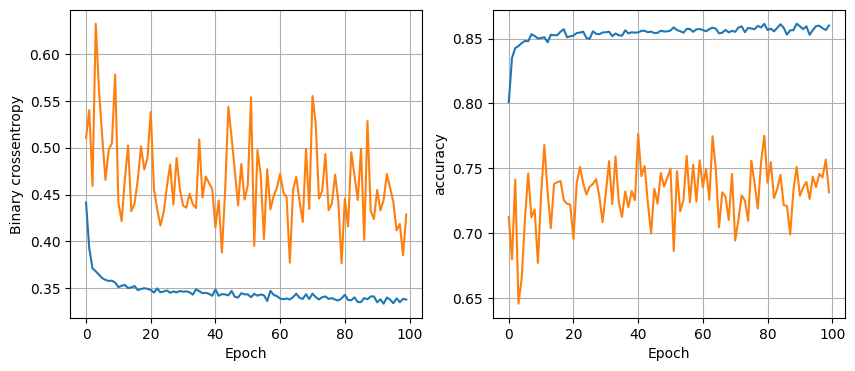

119/119 [==============================] - 0s 1ms/step - loss: 0.3285 - accuracy: 0.8691
16 nodes, dropout 0.2,lr 0.01, batch_size 64


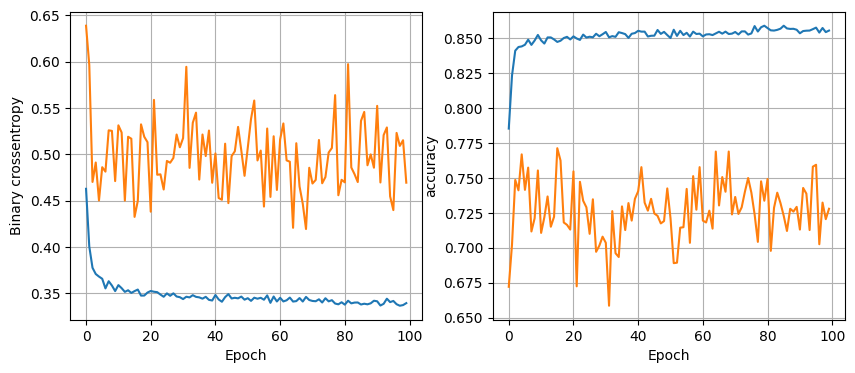

119/119 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.8670
16 nodes, dropout 0.2,lr 0.01, batch_size 128


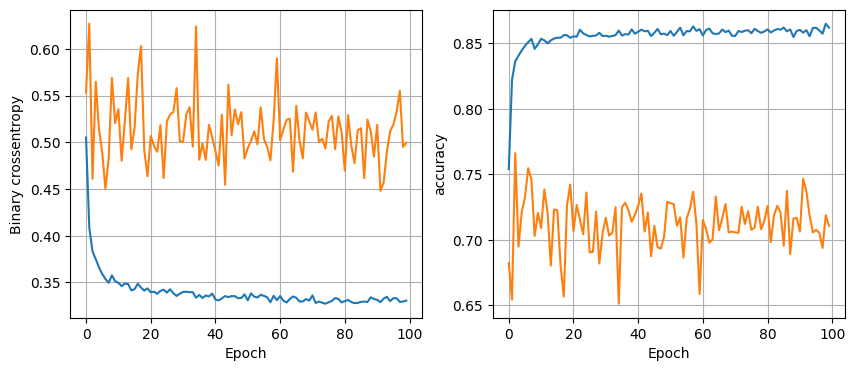

119/119 [==============================] - 0s 1ms/step - loss: 0.3131 - accuracy: 0.8696
16 nodes, dropout 0.2,lr 0.005, batch_size 32


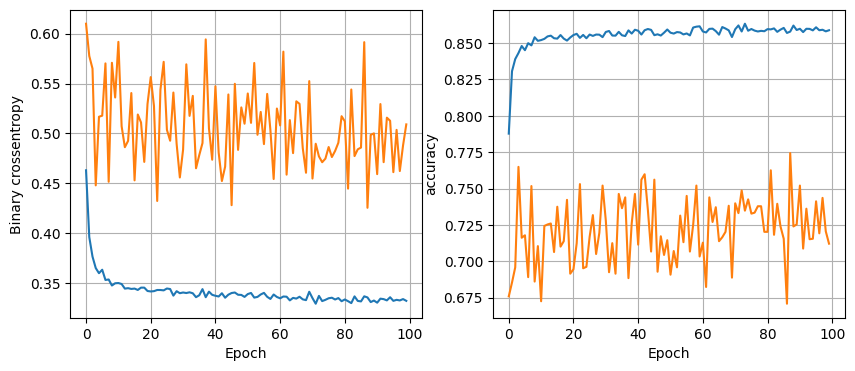

119/119 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8662
16 nodes, dropout 0.2,lr 0.005, batch_size 64


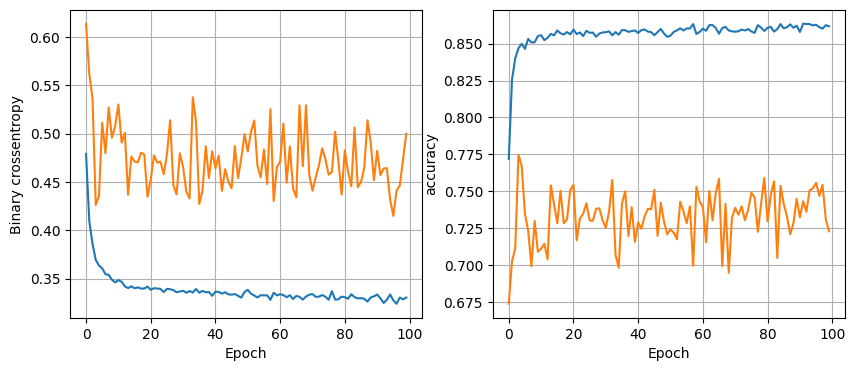

119/119 [==============================] - 0s 1ms/step - loss: 0.3149 - accuracy: 0.8704
16 nodes, dropout 0.2,lr 0.005, batch_size 128


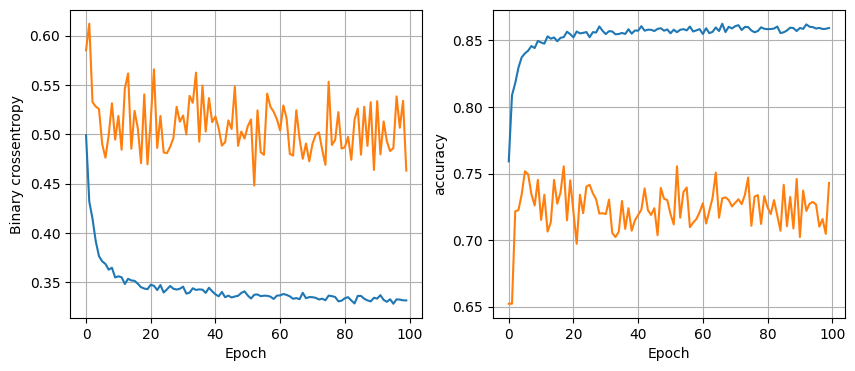

119/119 [==============================] - 0s 1ms/step - loss: 0.3163 - accuracy: 0.8675
16 nodes, dropout 0.2,lr 0.001, batch_size 32


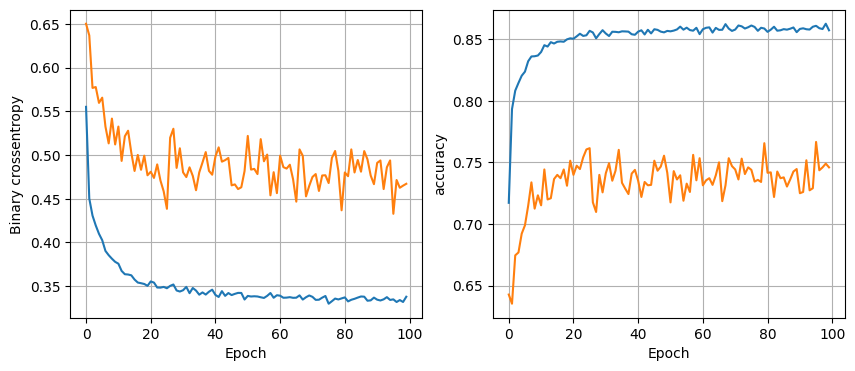

119/119 [==============================] - 0s 1ms/step - loss: 0.3210 - accuracy: 0.8717
16 nodes, dropout 0.2,lr 0.001, batch_size 64


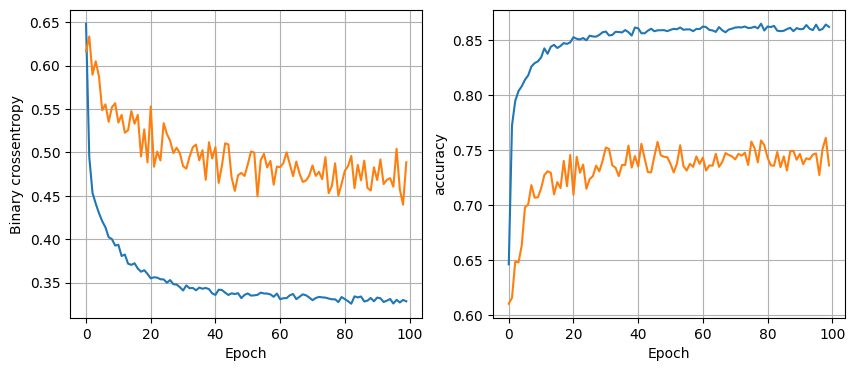

119/119 [==============================] - 0s 1ms/step - loss: 0.3205 - accuracy: 0.8725
16 nodes, dropout 0.2,lr 0.001, batch_size 128


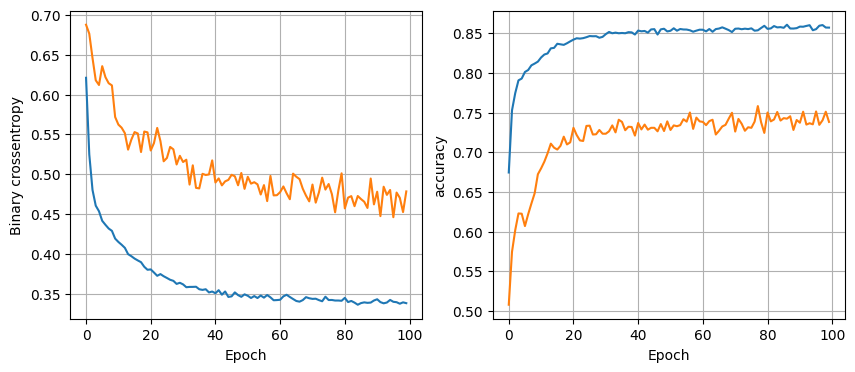

119/119 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8688
32 nodes, dropout 0,lr 0.01, batch_size 32


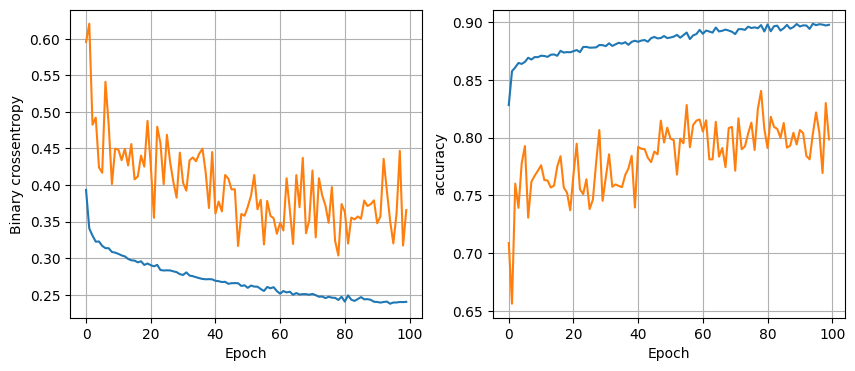

119/119 [==============================] - 0s 1ms/step - loss: 0.3802 - accuracy: 0.8638
32 nodes, dropout 0,lr 0.01, batch_size 64


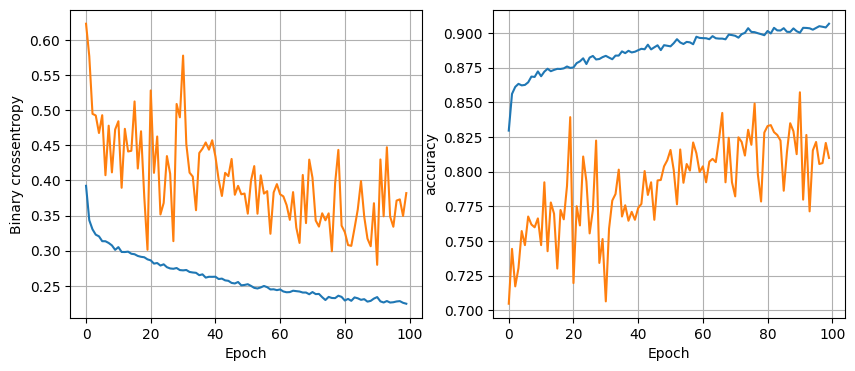

119/119 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8696
32 nodes, dropout 0,lr 0.01, batch_size 128


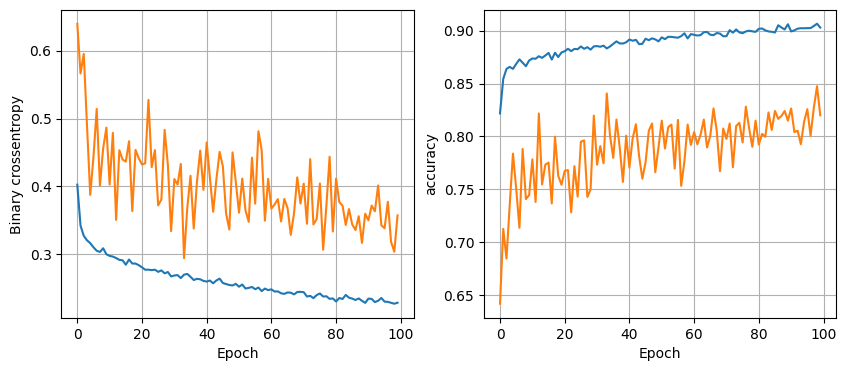

119/119 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.8601
32 nodes, dropout 0,lr 0.005, batch_size 32


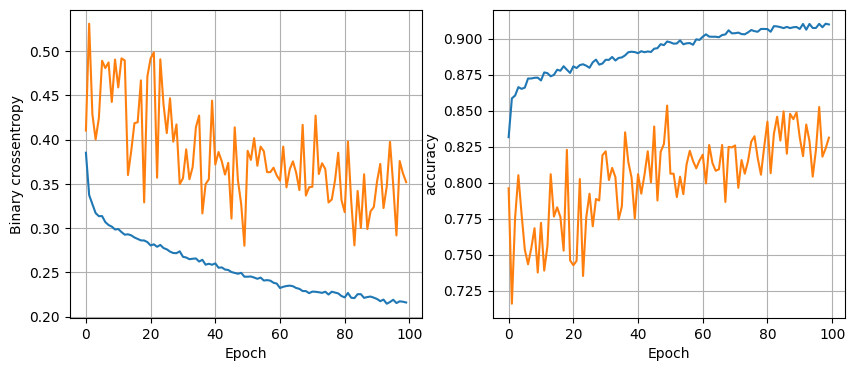

119/119 [==============================] - 0s 1ms/step - loss: 0.3962 - accuracy: 0.8651
32 nodes, dropout 0,lr 0.005, batch_size 64


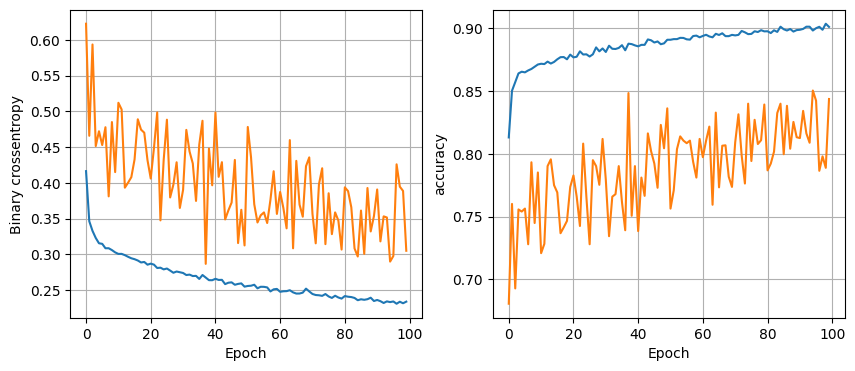

119/119 [==============================] - 0s 1ms/step - loss: 0.3627 - accuracy: 0.8680
32 nodes, dropout 0,lr 0.005, batch_size 128


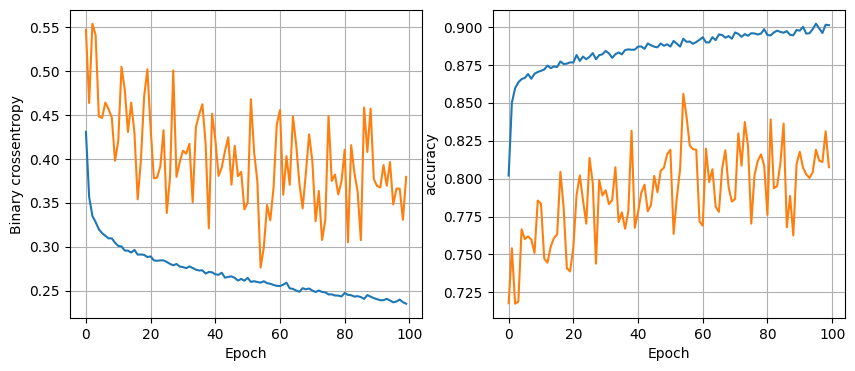

119/119 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8691
32 nodes, dropout 0,lr 0.001, batch_size 32


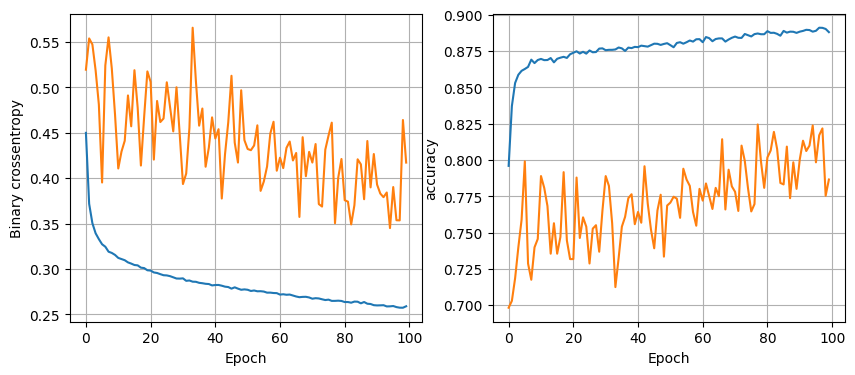

119/119 [==============================] - 0s 1ms/step - loss: 0.3245 - accuracy: 0.8693
32 nodes, dropout 0,lr 0.001, batch_size 64


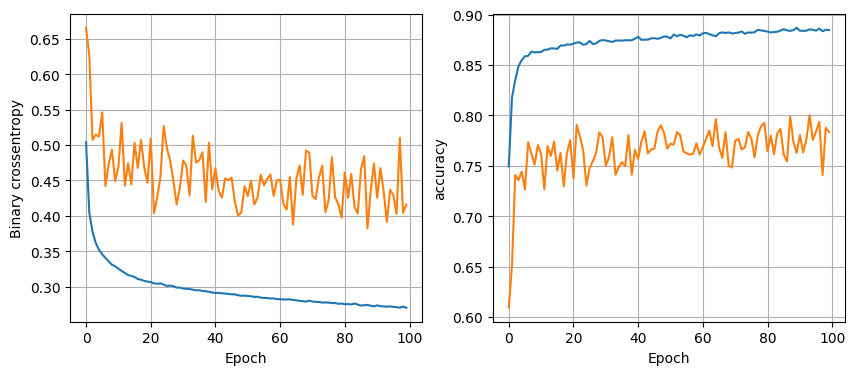

119/119 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8659
32 nodes, dropout 0,lr 0.001, batch_size 128


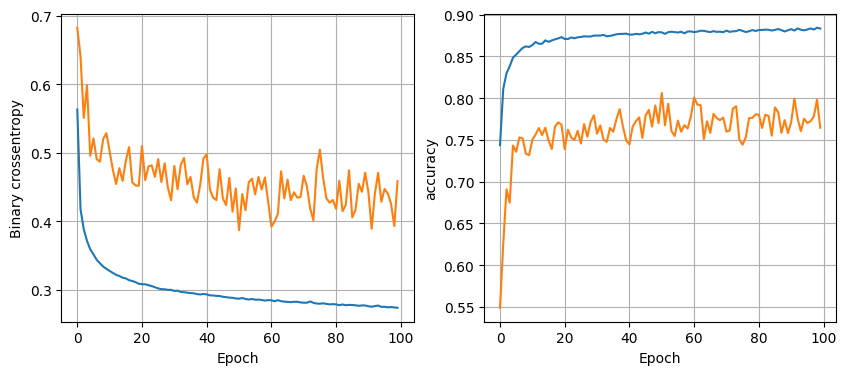

119/119 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8678
32 nodes, dropout 0.2,lr 0.01, batch_size 32


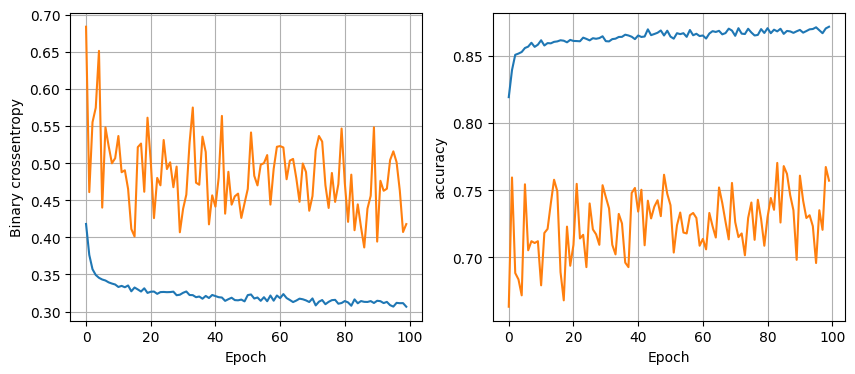

119/119 [==============================] - 0s 1ms/step - loss: 0.3153 - accuracy: 0.8701
32 nodes, dropout 0.2,lr 0.01, batch_size 64


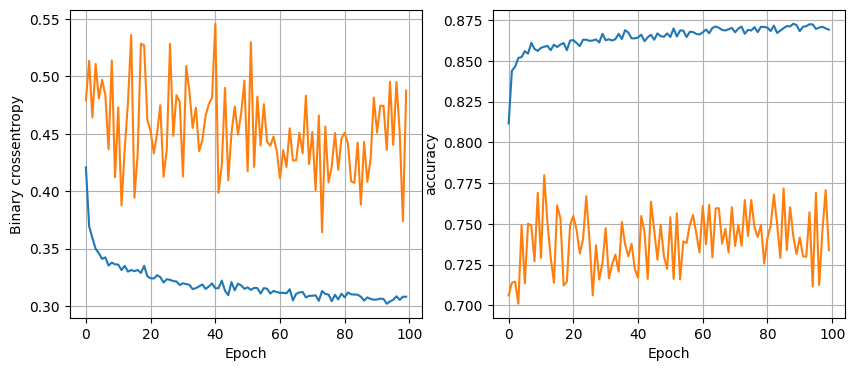

119/119 [==============================] - 0s 1ms/step - loss: 0.3150 - accuracy: 0.8712
32 nodes, dropout 0.2,lr 0.01, batch_size 128


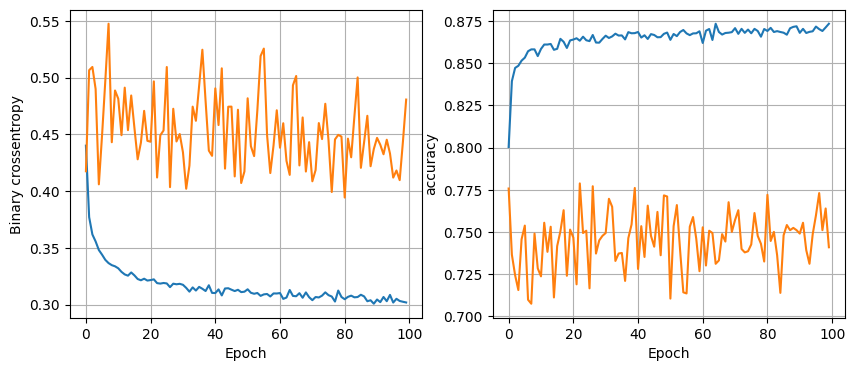

119/119 [==============================] - 0s 1ms/step - loss: 0.3104 - accuracy: 0.8670
32 nodes, dropout 0.2,lr 0.005, batch_size 32


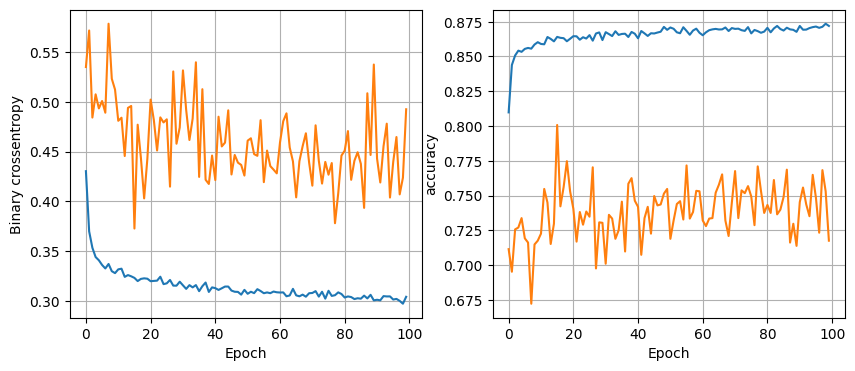

119/119 [==============================] - 0s 1ms/step - loss: 0.3183 - accuracy: 0.8693
32 nodes, dropout 0.2,lr 0.005, batch_size 64


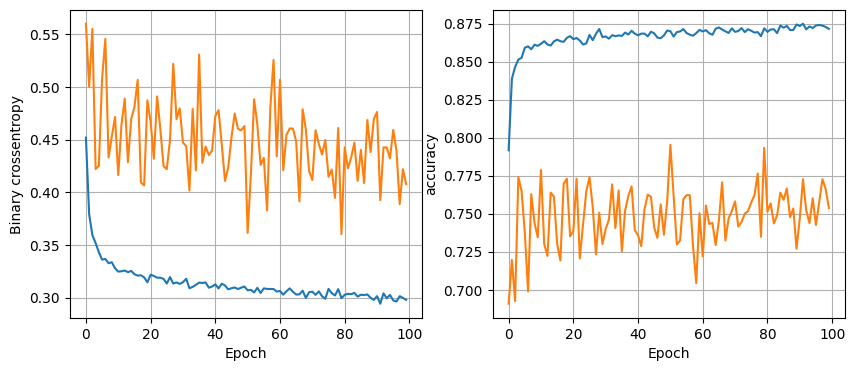

119/119 [==============================] - 0s 1ms/step - loss: 0.3038 - accuracy: 0.8788
32 nodes, dropout 0.2,lr 0.005, batch_size 128


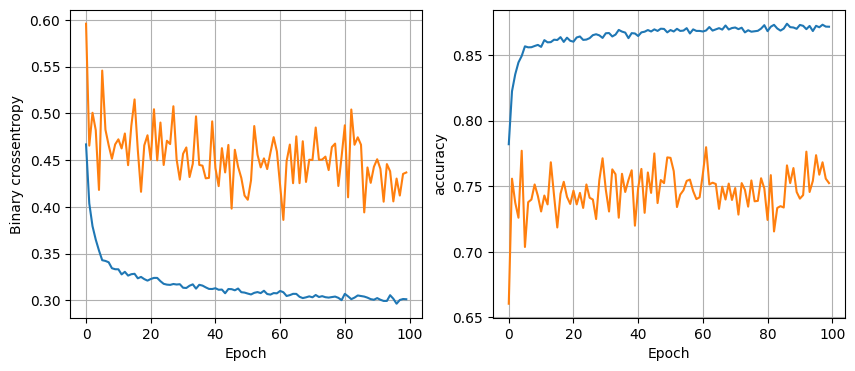

119/119 [==============================] - 0s 1ms/step - loss: 0.3101 - accuracy: 0.8754
32 nodes, dropout 0.2,lr 0.001, batch_size 32


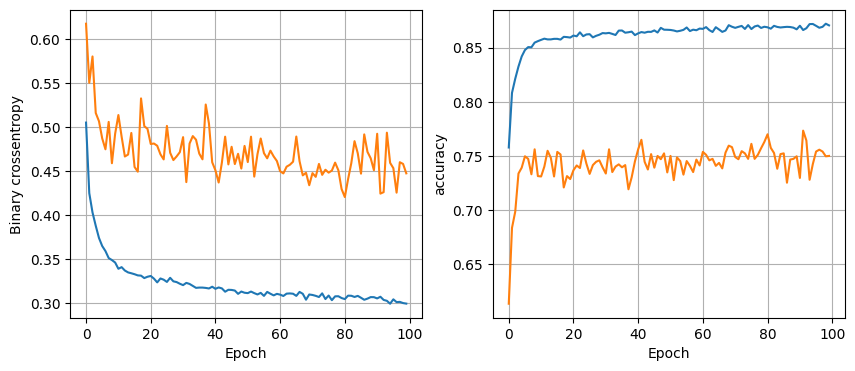

119/119 [==============================] - 0s 1ms/step - loss: 0.3090 - accuracy: 0.8772
32 nodes, dropout 0.2,lr 0.001, batch_size 64


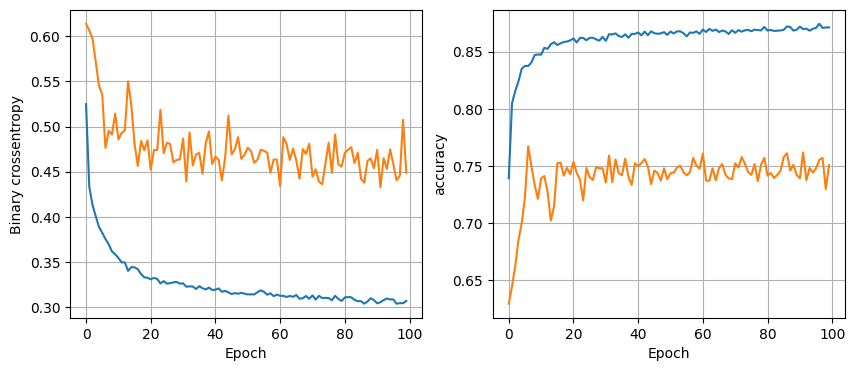

119/119 [==============================] - 0s 1ms/step - loss: 0.3059 - accuracy: 0.8738
32 nodes, dropout 0.2,lr 0.001, batch_size 128


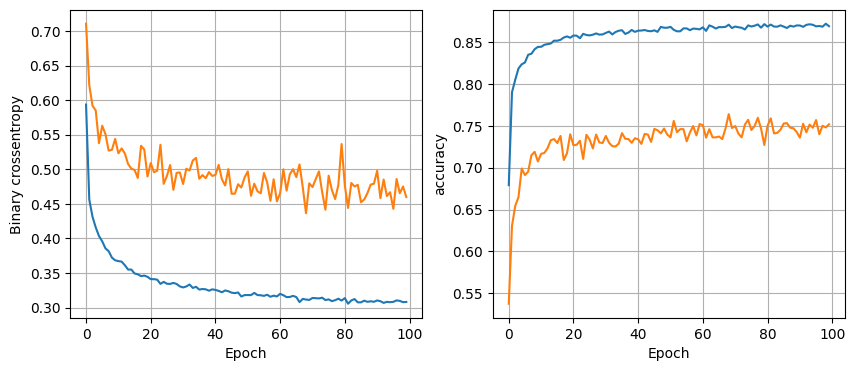

119/119 [==============================] - 0s 3ms/step - loss: 0.3078 - accuracy: 0.8738
64 nodes, dropout 0,lr 0.01, batch_size 32


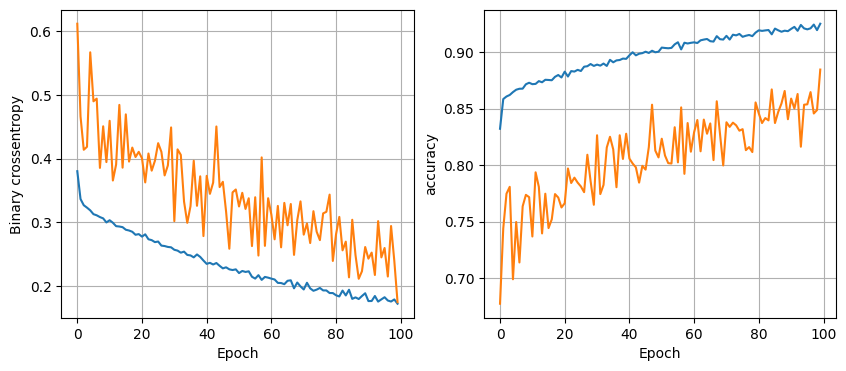

119/119 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.8483
64 nodes, dropout 0,lr 0.01, batch_size 64


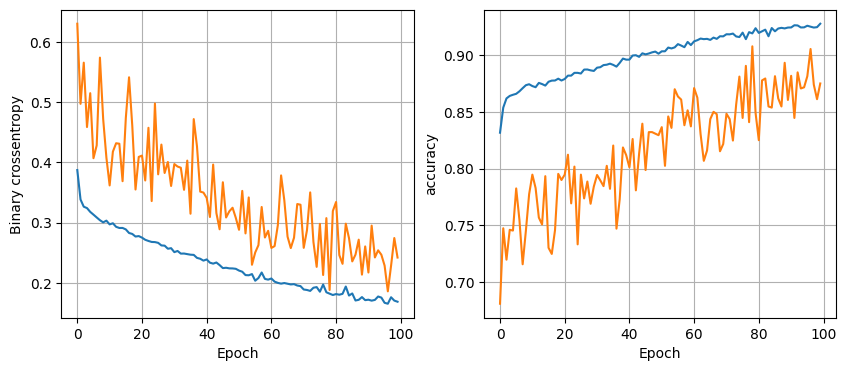

119/119 [==============================] - 0s 2ms/step - loss: 0.5548 - accuracy: 0.8654
64 nodes, dropout 0,lr 0.01, batch_size 128


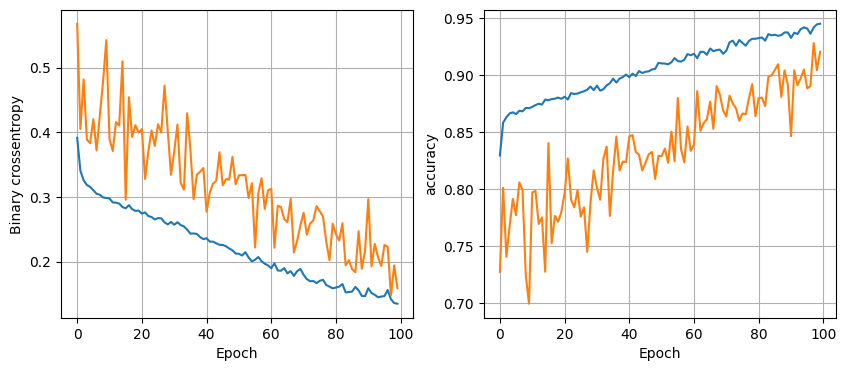

119/119 [==============================] - 0s 1ms/step - loss: 0.6600 - accuracy: 0.8507
64 nodes, dropout 0,lr 0.005, batch_size 32


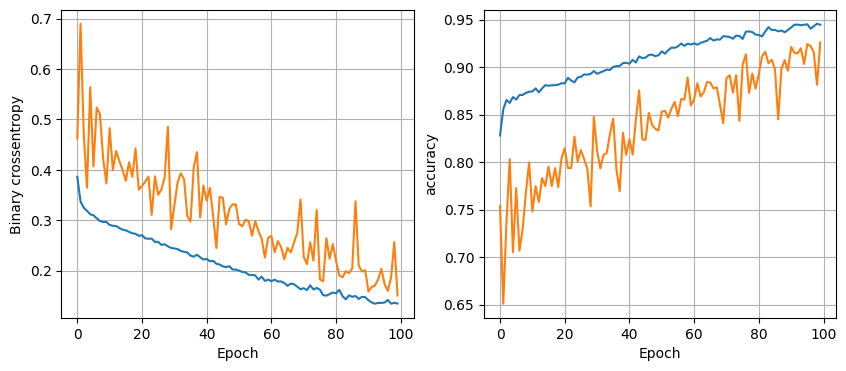

119/119 [==============================] - 0s 2ms/step - loss: 0.6166 - accuracy: 0.8567
64 nodes, dropout 0,lr 0.005, batch_size 64


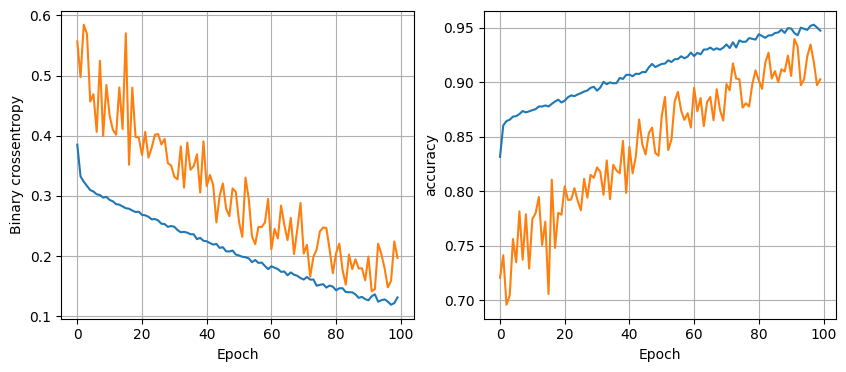

119/119 [==============================] - 0s 1ms/step - loss: 0.6337 - accuracy: 0.8567
64 nodes, dropout 0,lr 0.005, batch_size 128


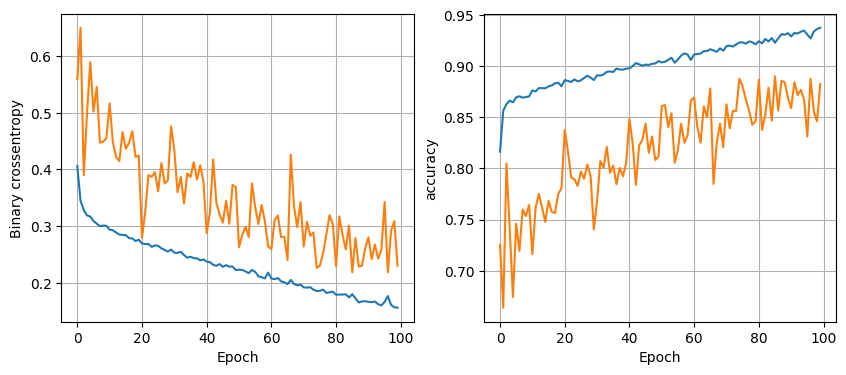

119/119 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8588
64 nodes, dropout 0,lr 0.001, batch_size 32


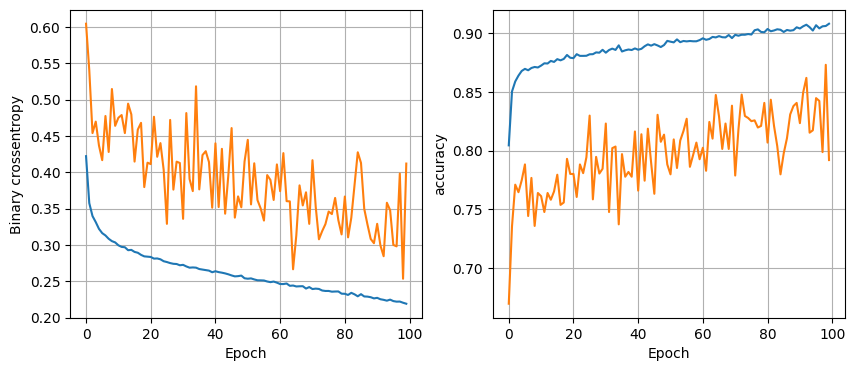

119/119 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8699
64 nodes, dropout 0,lr 0.001, batch_size 64


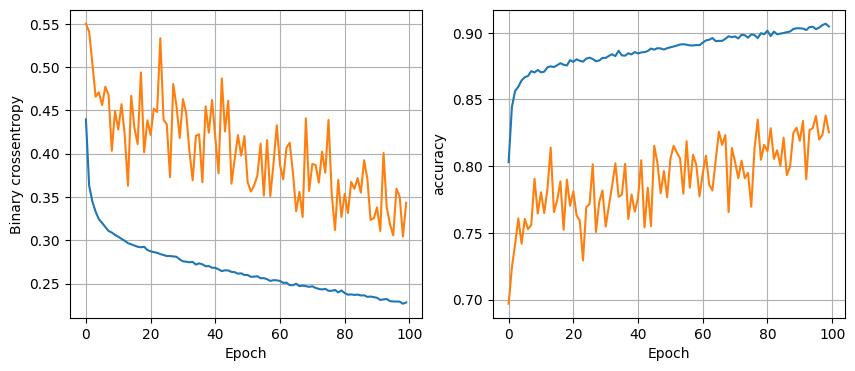

119/119 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 0.8688
64 nodes, dropout 0,lr 0.001, batch_size 128


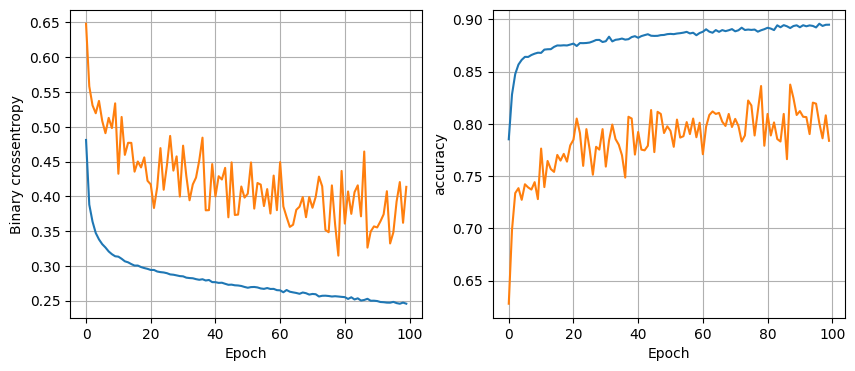

119/119 [==============================] - 0s 1ms/step - loss: 0.3251 - accuracy: 0.8733
64 nodes, dropout 0.2,lr 0.01, batch_size 32


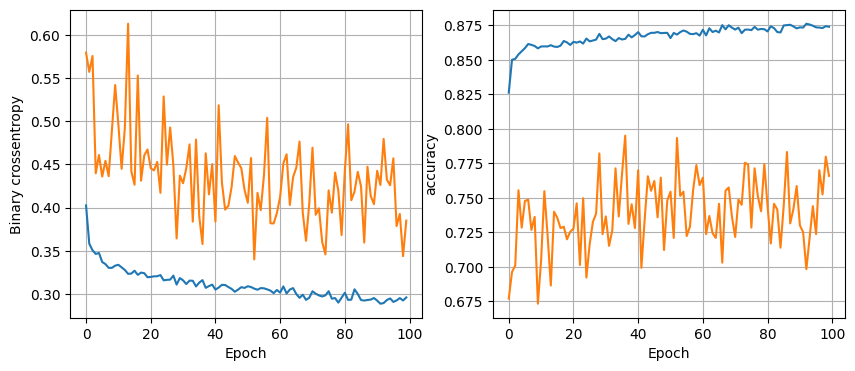

119/119 [==============================] - 0s 1ms/step - loss: 0.3257 - accuracy: 0.8722
64 nodes, dropout 0.2,lr 0.01, batch_size 64


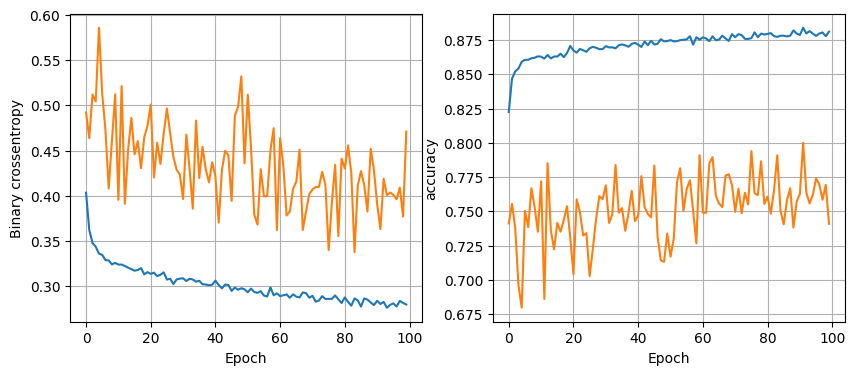

119/119 [==============================] - 0s 1ms/step - loss: 0.3181 - accuracy: 0.8704
64 nodes, dropout 0.2,lr 0.01, batch_size 128


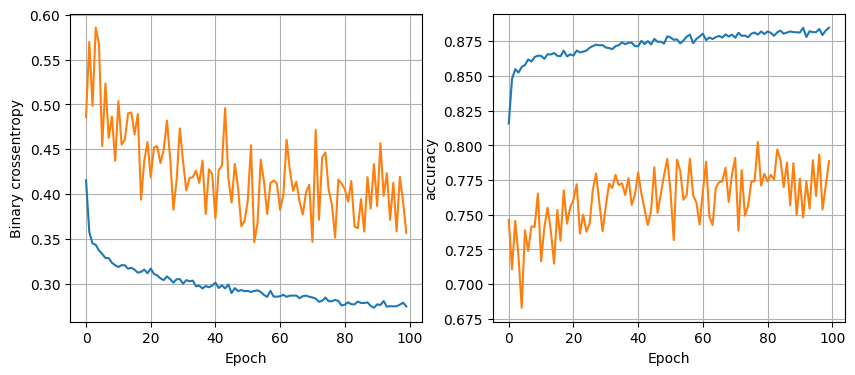

119/119 [==============================] - 0s 1ms/step - loss: 0.3178 - accuracy: 0.8707
64 nodes, dropout 0.2,lr 0.005, batch_size 32


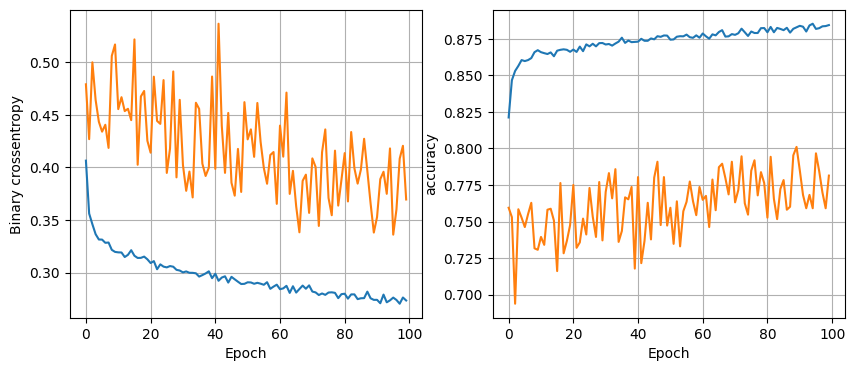

119/119 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.8741
64 nodes, dropout 0.2,lr 0.005, batch_size 64


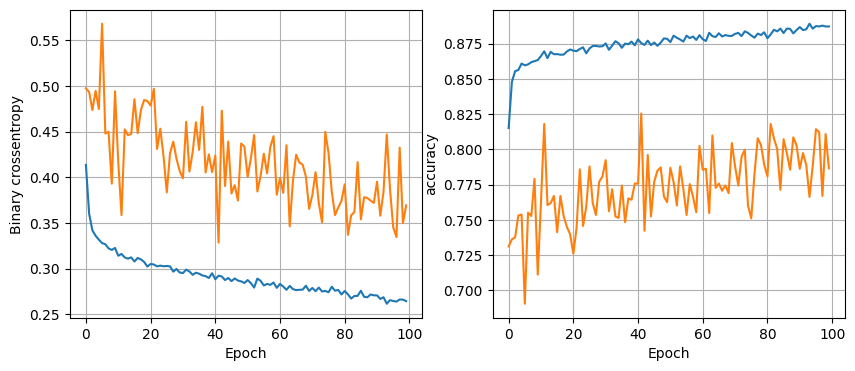

119/119 [==============================] - 0s 1ms/step - loss: 0.3084 - accuracy: 0.8757
64 nodes, dropout 0.2,lr 0.005, batch_size 128


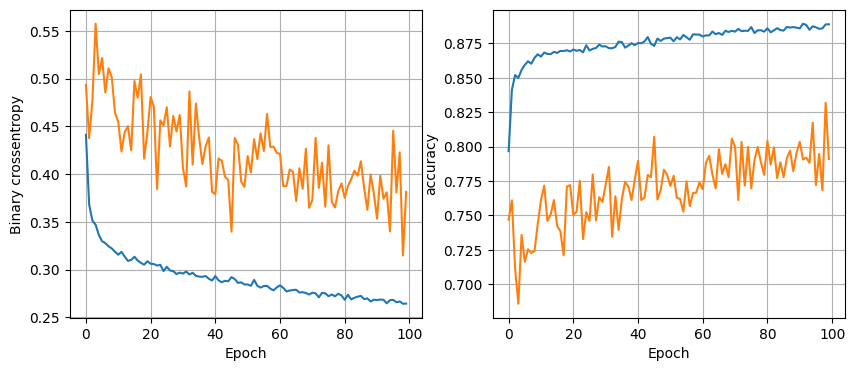

119/119 [==============================] - 0s 1ms/step - loss: 0.3114 - accuracy: 0.8780
64 nodes, dropout 0.2,lr 0.001, batch_size 32


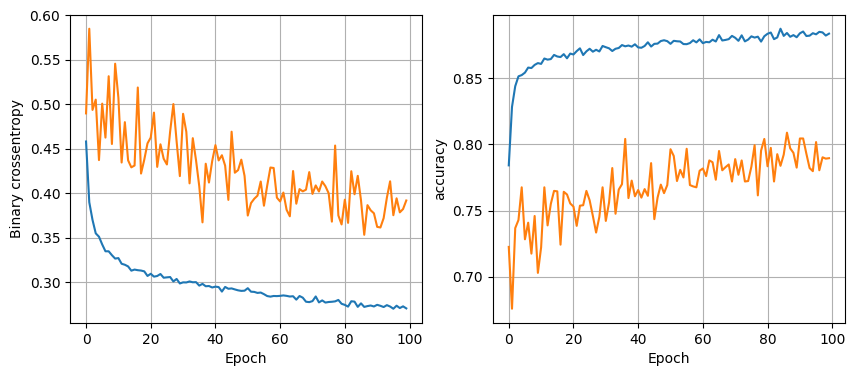

119/119 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8788
64 nodes, dropout 0.2,lr 0.001, batch_size 64


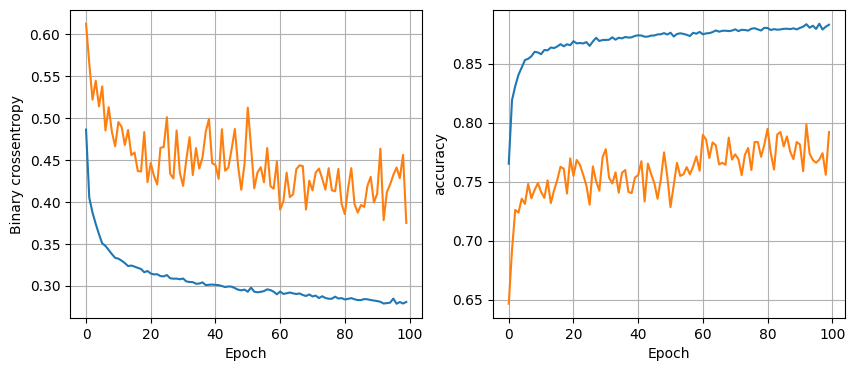

119/119 [==============================] - 0s 1ms/step - loss: 0.3016 - accuracy: 0.8741
64 nodes, dropout 0.2,lr 0.001, batch_size 128


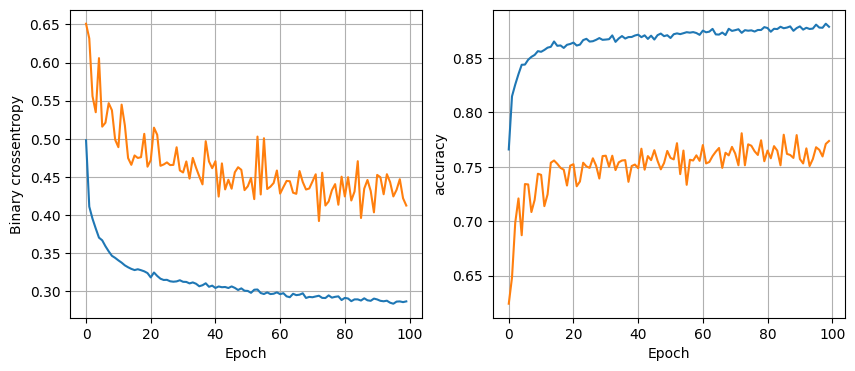

119/119 [==============================] - 0s 1ms/step - loss: 0.3026 - accuracy: 0.8757


In [39]:

least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0,0.2]:
    for lr in [0.01,0.005,0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob},lr {lr}, batch_size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model


In [43]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
y_pred

119/119 [==============================] - 1s 6ms/step


array([0, 0, 0, ..., 1, 0, 1])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1325
           1       0.87      0.94      0.90      2479

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

